# Temporal Planning 2021

In [12]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import copy
from os.path import (abspath, basename, dirname, isfile)

#### 100% width for wide screen monitor!
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### Configure paths

In [2]:
props_file = abspath("./results/results-eval/properties")

# Checks
if not isfile(props_file):
    raise ValueError("Incorrect property file path")

#### Process json

In [3]:
#Load Data
with open(props_file, 'r') as pf:
    raw_data = json.load(pf)

# Create DataFrame
df = pd.DataFrame(raw_data)
planners = list(set(pd.DataFrame(df.loc['id'].to_list()).loc[:,0]))

# Create a MultiIndex for df on "Planner", "Benchmarks Name","Domain", "Instance"
df.columns = pd.MultiIndex.from_tuples(df.loc['id'].to_list())
df=df.transpose()
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(df)

algorithm  \
cpt                       IPC-2018 airport               instance-10                                       cpt   
                                                         instance-13                                       cpt   
                                                         instance-14                                       cpt   
                                                         instance-19                                       cpt   
                                                         instance-2                                        cpt   
                                                         instance-23                                       cpt   
                                                         instance-27                                       cpt   
                                                         instance-4                                        cpt   
                                                         instance-7                                        cpt   
                                                         instance-9                                        cpt   
                                   floortile             p442-1                                            cpt   
                                                         p442-4                                            cpt   
                                                         p442-5                                            cpt   
                                                         p443-2                                            cpt   
                                                         p443-3                                            cpt   
                                                         p552-2                                            cpt   
                                                         p552-4                                            cpt   
                                                         p553-1                                            cpt   
                                                         p553-3                                            cpt   
                                                         p553-5                                            cpt   
                                   mapanalyser           pfile3-4-2-0-1                                    cpt   
                                                         pfile3-4-2-0-3                                    cpt   
                                                         pfile5-2-2-0-2                                    cpt   
                                                         pfile5-2-3-0-1                                    cpt   
                                                         pfile5-2-3-0-2                                    cpt   
                                                         pfile5-3-2-0-1                                    cpt   
                                                         pfile5-3-2-0-3                                    cpt   
                                                         pfile5-3-3-0-3                                    cpt   
                                                         pfile5-5-2-0-2                                    cpt   
                                                         pfile5-5-3-0-1                                    cpt   
                                   parking               p15-9-3                                           cpt   
                                                         p16-10-2                                          cpt   
                                                         p16-10-3                                          cpt   
                                                         p18-11-2                                          cpt   
                                                         p20-12-1                                          cpt 

#### Info on planners, their property headers and some common operations

In [4]:
print("Columns(Properties): ", df.columns.to_list(),"\n")
print("Rows(MultiIndex - {Planner, Problem}): ", df.index.to_list()[:10],"\n")
print("Planners =", planners)

Columns(Properties):  ['algorithm', 'benchmark_name', 'booleans', 'branches', 'conflicts', 'coverage', 'domain', 'id', 'integer_propagations', 'is_plan_found', 'is_plan_optimal', 'is_plan_valid', 'makespan', 'memory', 'memory_limit', 'num_actions', 'num_fluents', 'ort_variables', 'plan', 'plan_file', 'problem', 'propagations', 'run_dir', 'runtime_solver', 'runtime_total', 'solver_exit_code', 'time_limit', 'unexplained_errors', 'validate_exit_code'] 

Rows(MultiIndex - {Planner, Problem}):  [('cpt', 'IPC-2018', 'airport', 'instance-10'), ('cpt', 'IPC-2018', 'airport', 'instance-13'), ('cpt', 'IPC-2018', 'airport', 'instance-14'), ('cpt', 'IPC-2018', 'airport', 'instance-19'), ('cpt', 'IPC-2018', 'airport', 'instance-2'), ('cpt', 'IPC-2018', 'airport', 'instance-23'), ('cpt', 'IPC-2018', 'airport', 'instance-27'), ('cpt', 'IPC-2018', 'airport', 'instance-4'), ('cpt', 'IPC-2018', 'airport', 'instance-7'), ('cpt', 'IPC-2018', 'airport', 'instance-9')] 

Planners = ['optic', 'popf2', 'plan.

# Data processing and analysis

## Tables

#### Coverage

In [5]:
df.loc[:][['algorithm','coverage']].groupby(['algorithm']).sum()

,coverage
algorithm,
cpt,10
optic,11
plan.py she --no-validate,18
popf2,0


## Plots

#### Coverage over time

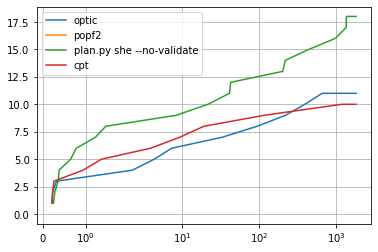

In [6]:
TIME_LIMIT = 1800.0
time_points = dict()
coverage_ov_time = dict()
for p in planners :
    time_points[p]= df.loc[p]['runtime_total'][df.loc[p]['coverage']>0].sort_values().to_list()
    coverage_ov_time[p] = list()
    step = 0
    for t in time_points[p]:
        step = step+1
        coverage_ov_time[p].append(step)
    time_points[p].append(TIME_LIMIT)
    coverage_ov_time[p].append(step)
    
for p in planners:
    plt.plot(time_points[p], coverage_ov_time[p], )
    plt.xscale('symlog')
    plt.grid(True)
plt.legend(planners)
plt.show()

####  Instance wise property comparison

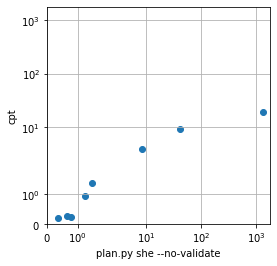

In [7]:
## Configuration
p1 = 'plan.py she --no-validate'
p2 = 'cpt'
prop = 'runtime_total'

## Retrieve data

s1 = pd.to_numeric(df.loc[[p1]][prop]*df.loc[[p1]]['coverage']).to_list()
s2 = pd.to_numeric(df.loc[[p2]][prop]*df.loc[[p2]]['coverage']).to_list()

data  = {p1:s1, p2:s2}

df_plot = pd.DataFrame(data)
df_plot = df_plot[df_plot>0].dropna()

x = df_plot[p1].to_list()
y = df_plot[p2].to_list()

## Plot
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)
plt.xlabel(p1)
plt.ylabel(p2)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlim(0, 1800)
plt.ylim(0, 1800)
plt.grid(True)
plt.scatter(x,y)

## Search Outcomes

In [8]:
# Exit Codes

"""
Fast Downward exit codes and their meaning. They are documented at
http://www.fast-downward.org/ExitCodes.
"""

import collections
import signal

def get_exit_code(signal_value):
    return 256 - signal_value

Outcome = collections.namedtuple("Outcome", ["value", "msg", "explained", "min_wins"])

NEW_OUTCOMES = [
    Outcome(0, "success", explained=True, min_wins=False),
    Outcome(6, "out-of-memory", explained=True, min_wins=True),
    Outcome(11, "search-unsolvable", explained=True, min_wins=False),
    Outcome(12, "search-unsolvable-incomplete", explained=True, min_wins=None),
    Outcome(24, "search-out-of-time", explained=True, min_wins=True),
    Outcome(100, "out-of-memory", explained=False, min_wins=True),
    Outcome(get_exit_code(signal.SIGKILL), "sigkill", explained=False, min_wins=True),
    Outcome(get_exit_code(signal.SIGSEGV), "segfault", explained=False, min_wins=True),
    Outcome(get_exit_code(signal.SIGXCPU), "timeout", explained=True, min_wins=True),
]

EXITCODE_TO_OUTCOME = {outcome.value: outcome for outcome in NEW_OUTCOMES}

OUTCOMES = NEW_OUTCOMES


def get_outcome(exitcode, use_legacy_exit_codes):
    if use_legacy_exit_codes and exitcode in EXITCODE_TO_LEGACY_OUTCOME:
        return EXITCODE_TO_LEGACY_OUTCOME[exitcode]
    elif not use_legacy_exit_codes and exitcode in EXITCODE_TO_OUTCOME:
        return EXITCODE_TO_OUTCOME[exitcode]
    else:
        msg = f"exitcode-{exitcode}"
        return Outcome(exitcode, msg, explained=False, min_wins=True)

## Update df solver_exit_status column
df_fullerr = copy.deepcopy(df)
df_fullerr['solver_exit_code'] = ([ (x, get_outcome(abs(x), False).msg) for x in df['solver_exit_code']]) 
df_errcode = df_fullerr[['algorithm','solver_exit_code', 'problem']].groupby(['algorithm','solver_exit_code']).count()

display(df_errcode)

display("Below is the list of instances that exit successfully but don't output a valid plan")
display(df[['algorithm','run_dir','solver_exit_code', 'problem']][
    (df['solver_exit_code']==0) & (df['coverage']==0)])

problem
algorithm                 solver_exit_code                  
cpt                       (-24, search-out-of-time)       21
                          (-6, out-of-memory)             37
                          (0, success)                    20
                          (100, out-of-memory)             2
optic                     (0, success)                    11
                          (6, out-of-memory)              58
                          (24, search-out-of-time)        11
plan.py she --no-validate (0, success)                    18
                          (6, out-of-memory)              40
                          (232, timeout)                  22
popf2                     (6, out-of-memory)              56
                          (11, search-unsolvable)         10
                          (24, search-out-of-time)        14

"Below is the list of instances that exit successfully but don't output a valid plan"

algorithm  \
cpt IPC-2018 mapanalyser        pfile3-4-2-0-1       cpt   
                                pfile3-4-2-0-3       cpt   
             trucks-time-strips instance-11          cpt   
                                instance-13          cpt   
                                instance-17          cpt   
                                instance-2           cpt   
                                instance-5           cpt   
                                instance-6           cpt   
                                instance-8           cpt   
                                instance-9           cpt   

                                                               run_dir  \
cpt IPC-2018 mapanalyser        pfile3-4-2-0-1  runs-00001-00100/00031   
                                pfile3-4-2-0-3  runs-00001-00100/00032   
             trucks-time-strips instance-11     runs-00001-00100/00076   
                                instance-13     runs-00001-00100/00077   
                                instance-17     runs-00001-00100/00080   
                                instance-2      runs-00001-00100/00071   
                                instance-5      runs-00001-00100/00072   
                                instance-6      runs-00001-00100/00073   
                                instance-8      runs-00001-00100/00074   
                                instance-9      runs-00001-00100/00075   

                                               solver_exit_code problem  
cpt IPC-2018 mapanalyser        pfile3-4-2-0-1                0     p01  
                                pfile3-4-2-0-3                0     p02  
             trucks-time-strips instance-11                   0     p11  
                                instance-13                   0     p13  
                                instance-17                   0     p17  
                                instance-2                    0     p02  
                                instance-5                    0     p05  
                                instance-6                    0     p06  
                                instance-8                    0     p08  
                                instance-9                    0     p09

## Instance View

#### View properties

In [9]:
#### ORTOOLS-CPT info :

# ground predicates - 
# ground operators - 
# variables in CP Model -  
# constraints in CP Model - Not available right now, check ortools trace


display(df_fullerr.loc['cpt','IPC-2018'][['num_fluents','num_actions', 'ort_variables','solver_exit_code','run_dir']])


num_fluents num_actions  \
airport               instance-10                        135          31   
                      instance-13                        291          89   
                      instance-14                        424         151   
                      instance-19                        681         231   
                      instance-2                          73          25   
                      instance-23                       2640         899   
                      instance-27                       3820        1445   
                      instance-4                         119          25   
                      instance-7                         273          79   
                      instance-9                         451         145   
floortile             p442-1                              80         186   
                      p442-4                              80         186   
                      p442-5                              80         186   
                      p443-2                             102         278   
                      p443-3                             102         278   
                      p552-2                             119         292   
                      p552-4                             119         292   
                      p553-1                             151         437   
                      p553-3                             151         437   
                      p553-5                             151         437   
mapanalyser           pfile3-4-2-0-1                     183         762   
                      pfile3-4-2-0-3                     183         762   
                      pfile5-2-2-0-2                     653        2294   
                      pfile5-2-3-0-1                     653        2294   
                      pfile5-2-3-0-2                     653        2294   
                      pfile5-3-2-0-1                     680        2880   
                      pfile5-3-2-0-3                     680        2880   
                      pfile5-3-3-0-3                     680        2880   
                      pfile5-5-2-0-2                     734        4052   
                      pfile5-5-3-0-1                     734        4052   
parking               p15-9-3                            570       18986   
                      p16-10-2                           286        6162   
                      p16-10-3                           286        6162   
                      p18-11-2                           348        8516   
                      p20-12-1                           416       11402   
                      p20-12-3                           416       11402   
                      p22-13-2                           490       14874   
                      p24-14-1                           570       18986   
                      p24-14-2                           570       18986   
                      p26-15-1                           656       23792   
quantum_circuit       problem_n21_i13_u0.9_P1_V2         882       20162   
                      problem_n21_i1_u1.0_P1_V2          882       20162   
                      problem_n21_i50_u0.9_P1_V2         882       20162   
                      problem_n40_i18_u1.0_P1_V2        None        None   
                      problem_n40_i9_u0.9_P1_V2         None        None   
                      problem_n4_i1_u1.0_P1_V2            32          98   
                      problem_n4_i27_u1.0_P1_V2           32          98   
                      problem_n8_i34_u1.0_P1_V2          128         898   
                      problem_n8_i38_u0.9_P1_V2          128         898   
                      problem_n8_i7_u1.0_P1_V2           128         898   
road-traffic-accident instance-11                       2176        9400   
                      instance-13                       1844        6711   
                     

#### View error logs/ ortools trace

In [10]:
#### Increase pandas col width
temp = pd.options.display.max_colwidth
pd.options.display.max_colwidth = None

#### Print error log(Has OR-TOOLS Trace) for an instance
print(df_fullerr.loc['cpt','IPC-2018','airport','instance-13']
      [['solver_exit_code','unexplained_errors','run_dir']][1][0])

#### Reset width
pd.options.display.max_colwidth = temp

run.err: WARNING: Logging before InitGoogleLogging() is written to STDERR
I0331 15:07:18.148532 53408 cp_model_solver.cc:2879] Parameters: log_search_progress: true
I0331 15:07:18.161967 53408 cp_model_solver.cc:2901] Optimization model '':
#Variables: 14623 (1 in objective)
 - 13520 in [0,1]
 - 507 in [0,88]
 - 596 in [0,1610]
#kBoolAnd: 886 (#enforced: 885) (#literals: 887)
#kBoolOr: 507 (#enforced: 507) (#literals: 885)
#kLinear1: 4426 (#enforced: 4425)
#kLinear2: 24003 (#enforced: 23916)
I0331 15:07:18.176704 53408 cp_model_solver.cc:2944] *** starting model presolve at 0.03s
I0331 15:07:18.744057 53408 simplification.cc:336] num removable Booleans: 12940 / 14623
I0331 15:07:18.744257 53408 simplification.cc:338] num trivial clauses: 210
I0331 15:07:18.744328 53408 simplification.cc:923]  [0s] clauses:540 literals:1184 vars:507 one_side_vars:411 simple_definition:92 singleton_clauses:0
I0331 15:07:18.744670 53408 simplification.cc:923]  [0.000621707s] clauses:498 literals:1018 vars